### Notebook
- Creates boxplots from Fig. 1, 2, 4, S7

In [1]:
import pandas as pd
import numpy as np
import os

from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

### Global variables

In [2]:
MSS = 'MSS_only' # MSS_only, MSS_and_MSI
RM_SEX_SPECIFIC = 'remove_sex_specific' # remove_sex_specific, kept_sex_specific

### 0. Load data

##### 0A. Load data with sex-specific cancers removed (for sex analyses)

In [3]:
RM_SEX_SPECIFIC = 'remove_sex_specific'
print('Loading confident {} patients with {} cancers'.format(MSS, RM_SEX_SPECIFIC))

exp_phbrI_score_rm_sex_specific_df = pd.read_csv('../generated_data/confident_patient_I.age_sex_disease.{}.{}.tsv'.format(MSS, RM_SEX_SPECIFIC), sep='\t', index_col=0)
exp_phbrII_score_rm_sex_specific_df = pd.read_csv('../generated_data/confident_patient_II.age_sex_disease.{}.{}.tsv'.format(MSS, RM_SEX_SPECIFIC), sep='\t', index_col=0)

# set previously determined age threshold
young_thresh = 52 # 30th percentile: 52
old_thresh = 68   # 70th percentile: 68

exp_phbrI_score_rm_sex_specific_df['age_categorical_3070'] = pd.cut(exp_phbrI_score_rm_sex_specific_df['age'], [0, young_thresh, old_thresh, exp_phbrI_score_rm_sex_specific_df['age'].max()], labels=['younger', 'middle', 'older'])
exp_phbrII_score_rm_sex_specific_df['age_categorical_3070'] = pd.cut(exp_phbrII_score_rm_sex_specific_df['age'], [0, young_thresh, old_thresh, exp_phbrII_score_rm_sex_specific_df['age'].max()], labels=['younger', 'middle', 'older'])

print('{} confident MHC-I, {} confident MHC-II'.format(len(exp_phbrI_score_rm_sex_specific_df), len(exp_phbrII_score_rm_sex_specific_df)))

Loading confident MSS_only patients with remove_sex_specific cancers
3870 confident MHC-I, 4061 confident MHC-II


##### 0B. Load data with sex-specific cancers kept (for age analyses)

In [4]:
RM_SEX_SPECIFIC = 'kept_sex_specific'
print('Loading confident {} patients with {} cancers'.format(MSS, RM_SEX_SPECIFIC))

exp_phbrI_score_kept_sex_specific_df = pd.read_csv('/cellar/users/andreabc/Data/hla_sex/generated_data/confident_patient_I.age_sex_disease.{}.{}.txt'.format(MSS, RM_SEX_SPECIFIC), sep='\t', index_col=0)
exp_phbrII_score_kept_sex_specific_df = pd.read_csv('/cellar/users/andreabc/Data/hla_sex/generated_data/confident_patient_II.age_sex_disease.{}.{}.txt'.format(MSS, RM_SEX_SPECIFIC), sep='\t', index_col=0)

# set age threshold
young_thresh = 52 # 30th percentile: 52, 40th: 57
old_thresh = 68   # 70th percentile: 68, 60th: 65

exp_phbrI_score_kept_sex_specific_df['age_categorical_3070'] = pd.cut(exp_phbrI_score_kept_sex_specific_df['age'], [0, young_thresh, old_thresh, exp_phbrI_score_kept_sex_specific_df['age'].max()], labels=['younger', 'middle', 'older'])
exp_phbrII_score_kept_sex_specific_df['age_categorical_3070'] = pd.cut(exp_phbrII_score_kept_sex_specific_df['age'], [0, young_thresh, old_thresh, exp_phbrII_score_kept_sex_specific_df['age'].max()], labels=['younger', 'middle', 'older'])

print('{} confident MHC-I, {} confident MHC-II'.format(len(exp_phbrI_score_kept_sex_specific_df), len(exp_phbrII_score_kept_sex_specific_df)))
exp_phbrI_score_kept_sex_specific_df.head(2)

Loading confident MSS_only patients with kept_sex_specific cancers
4850 confident MHC-I, 4555 confident MHC-II


,scores,disease,age,sex,age_categorical,age_categorical_3070
TCGA-85-8580,0.120879,LUSC,52.0,female,younger,younger
TCGA-A5-A0GV,3.524218,UCEC,67.0,female,older,middle


### 1. Plot Figure 1
- Discovery cohort 

Saving to ../figures/Figure_1.pdf


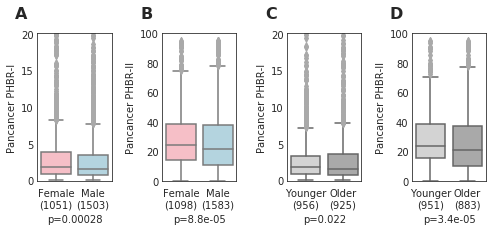

In [20]:
# props
flierprops = dict(markerfacecolor='darkgrey', markersize=5, linestyle='none', markeredgecolor='darkgrey')


plt.figure(figsize=(7,3))

##################
# A - Sex, MHC-I #
##################
plt.subplot(1,4,1)
p = mannwhitneyu(exp_phbrI_score_rm_sex_specific_df[exp_phbrI_score_rm_sex_specific_df['sex']=='female'].scores.values, 
                 exp_phbrI_score_rm_sex_specific_df[exp_phbrI_score_rm_sex_specific_df['sex']=='male'].scores.values).pvalue
ax = sns.boxplot(x='sex', y='scores', data=exp_phbrI_score_rm_sex_specific_df, 
                 order=['female', 'male'], palette=['lightpink', 'lightblue'], flierprops=flierprops)
plt.xlabel('p={:.2}'.format(p)), plt.ylabel('Pancancer PHBR-I')
plt.xticks([0,1], ['Female\n({})'.format(len(set(exp_phbrI_score_rm_sex_specific_df[exp_phbrI_score_rm_sex_specific_df['sex']=='female'].index))), 
                   'Male\n({})'.format(len(set(exp_phbrI_score_rm_sex_specific_df[exp_phbrI_score_rm_sex_specific_df['sex']=='male'].index)))])
plt.ylim(-0.1,20.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'A', transform=ax.transAxes, fontsize=16,  weight='bold')
    
###################
# B - Sex, MHC-II #
###################
plt.subplot(1,4,2)
p = mannwhitneyu(exp_phbrII_score_rm_sex_specific_df[exp_phbrII_score_rm_sex_specific_df['sex']=='female'].scores.values, 
                 exp_phbrII_score_rm_sex_specific_df[exp_phbrII_score_rm_sex_specific_df['sex']=='male'].scores.values).pvalue
ax = sns.boxplot(x='sex', y='scores', data=exp_phbrII_score_rm_sex_specific_df, 
                 order=['female', 'male'], palette=['lightpink', 'lightblue'], flierprops=flierprops)
plt.xlabel('p={:.2}'.format(p)), plt.ylabel('Pancancer PHBR-II')
plt.xticks([0,1], ['Female\n({})'.format(len(set(exp_phbrII_score_rm_sex_specific_df[exp_phbrII_score_rm_sex_specific_df['sex']=='female'].index))), 
                   'Male\n({})'.format(len(set(exp_phbrII_score_rm_sex_specific_df[exp_phbrII_score_rm_sex_specific_df['sex']=='male'].index)))])
plt.ylim(-0.1,100.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'B', transform=ax.transAxes, fontsize=16,  weight='bold')

##################
# C - Age, MHC-I #
##################
plt.subplot(1,4,3)
p = mannwhitneyu(exp_phbrI_score_kept_sex_specific_df[exp_phbrI_score_kept_sex_specific_df['age_categorical_3070']=='younger'].scores.values, 
                 exp_phbrI_score_kept_sex_specific_df[exp_phbrI_score_kept_sex_specific_df['age_categorical_3070']=='older'].scores.values).pvalue
ax = sns.boxplot(x='age_categorical_3070', y='scores', data=exp_phbrI_score_kept_sex_specific_df, 
                 order=['younger', 'older'], palette=['lightgrey', 'darkgrey'], flierprops=flierprops)
plt.xlabel('p={:.2}'.format(p)), plt.ylabel('Pancancer PHBR-I')
plt.xticks([0,1], ['Younger\n({})'.format(len(set(exp_phbrI_score_kept_sex_specific_df[exp_phbrI_score_kept_sex_specific_df['age_categorical_3070']=='younger'].index))), 
                   'Older\n({})'.format(len(set(exp_phbrI_score_kept_sex_specific_df[exp_phbrI_score_kept_sex_specific_df['age_categorical_3070']=='older'].index)))])
plt.ylim(-0.1,20.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'C', transform=ax.transAxes, fontsize=16,  weight='bold')

###################
# D - Age, MHC-II #
###################
plt.subplot(1,4,4)
p = mannwhitneyu(exp_phbrII_score_kept_sex_specific_df[exp_phbrII_score_kept_sex_specific_df['age_categorical_3070']=='younger'].scores.values, 
                 exp_phbrII_score_kept_sex_specific_df[exp_phbrII_score_kept_sex_specific_df['age_categorical_3070']=='older'].scores.values).pvalue
ax = sns.boxplot(x='age_categorical_3070', y='scores', data=exp_phbrII_score_kept_sex_specific_df, 
                 order=['younger', 'older'], palette=['lightgrey', 'darkgrey'], flierprops=flierprops)
plt.xlabel('p={:.2}'.format(p)), plt.ylabel('Pancancer PHBR-II')
plt.xticks([0,1], ['Younger\n({})'.format(len(set(exp_phbrII_score_kept_sex_specific_df[exp_phbrII_score_kept_sex_specific_df['age_categorical_3070']=='younger'].index))), 
                   'Older\n({})'.format(len(set(exp_phbrII_score_kept_sex_specific_df[exp_phbrII_score_kept_sex_specific_df['age_categorical_3070']=='older'].index)))])
plt.ylim(-0.1,100.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'D', transform=ax.transAxes, fontsize=16,  weight='bold')


plt.tight_layout()
savepath = '../figures/Figure_1.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches="tight")
plt.show()

### 2. Plot Figure 2
- Discovery cohort

In [5]:
import sys
sys.path.append('../scripts/')
from benjamini_fdr import benjamini_fdr

In [6]:
def get_joint_pvals(df, score_col='scores'):
    '''Calculates the joint p-values between all patient groups
    @param: df: pandas dataframe 
    
    '''
    data = df.copy()
    f_data = data[data['sex']=='female']
    m_data = data[data['sex']=='male']

    YF_OF = mannwhitneyu(f_data[f_data['age_categorical_3070'] == 'younger'][score_col].values, 
                         f_data[f_data['age_categorical_3070'] == 'older'][score_col].values).pvalue
    YF_OM = mannwhitneyu(f_data[f_data['age_categorical_3070'] == 'younger'][score_col].values, 
                         m_data[m_data['age_categorical_3070'] == 'older'][score_col].values).pvalue
    YF_YM = mannwhitneyu(f_data[f_data['age_categorical_3070'] == 'younger'][score_col].values, 
                         m_data[m_data['age_categorical_3070'] == 'younger'][score_col].values).pvalue

    OF_YM = mannwhitneyu(f_data[f_data['age_categorical_3070'] == 'older'][score_col].values, 
                         m_data[m_data['age_categorical_3070'] == 'younger'][score_col].values).pvalue
    OF_OM = mannwhitneyu(f_data[f_data['age_categorical_3070'] == 'older'][score_col].values, 
                         m_data[m_data['age_categorical_3070'] == 'older'][score_col].values).pvalue

    YM_OM = mannwhitneyu(m_data[m_data['age_categorical_3070'] == 'younger'][score_col].values, 
                         m_data[m_data['age_categorical_3070'] == 'older'][score_col].values).pvalue

    pvals = [['Young female, Old female', YF_OF], ['Young female, Old male', YF_OM], 
             ['Young female, Young male', YF_YM], ['Old female, Young male', OF_YM], 
             ['Old female, Old male', OF_OM], ['Young male, Old male', YM_OM]]
    return benjamini_fdr(pvals)

PHBR-I corrected p-values: 
                          0         1
0  Young female, Young male  0.000247
1    Young female, Old male  0.000257
2  Young female, Old female  0.027704
3      Old female, Old male  0.162692
4    Old female, Young male  0.163707
5      Young male, Old male  0.424064

PHBR-II corrected p-values: 
                          0             1
0    Young female, Old male  2.275692e-07
1  Young female, Young male  5.186816e-04
2  Young female, Old female  9.668476e-04
3      Young male, Old male  2.093698e-02
4      Old female, Old male  8.324460e-02
5    Old female, Young male  3.461662e-01

Saving to ../figures/Figure_2.pdf


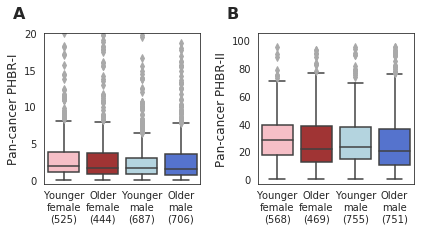

In [32]:
flierprops = dict(markerfacecolor='darkgrey', markersize=5, linestyle='none', markeredgecolor='darkgrey')

#############
# A. PHBR-I #
#############

# Add age+sex category column
data = exp_phbrI_score_rm_sex_specific_df.copy()
data['category'] = ['{} {}'.format(data['age_categorical_3070'].values[i], 
                                   data['sex'].values[i]) for i in range(len(data.index.values))]

print('PHBR-I corrected p-values: \n{}\n'.format(pd.DataFrame(get_joint_pvals(data))))

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
ax = sns.boxplot(x='category', y='scores', data=data, 
                 order=['younger female', 'older female', 'younger male', 'older male'], 
                 palette=['lightpink', 'firebrick', 'lightblue', 'royalblue'], 
                 flierprops=flierprops)
plt.xlabel(''), plt.ylabel('Pan-cancer PHBR-I', fontsize=12)
plt.xticks([0,1,2,3],['Younger\nfemale\n({})'.format(len(data[data['category']=='younger female'])), 
                      'Older\nfemale\n({})'.format(len(data[data['category']=='older female'])), 
                      'Younger\nmale\n({})'.format(len(data[data['category']=='younger male'])), 
                      'Older\nmale\n({})'.format(len(data[data['category']=='older male']))])
plt.ylim(-0.5,20)
plt.text(-0.2, 1.1, 'A', transform=ax.transAxes, fontsize=16,  weight='bold')



##############
# B. PHBR-II #
##############

# Add age+sex category column
data = exp_phbrII_score_rm_sex_specific_df.copy()
data['category'] = ['{} {}'.format(data['age_categorical_3070'].values[i], 
                                   data['sex'].values[i]) for i in range(len(data.index.values))]

print('PHBR-II corrected p-values: \n{}\n'.format(pd.DataFrame(get_joint_pvals(data))))

plt.subplot(1,2,2)
ax = sns.boxplot(x='category', y='scores', data=data, 
                 order=['younger female', 'older female', 'younger male', 'older male'], 
                 palette=['lightpink', 'firebrick', 'lightblue', 'royalblue'], 
                 flierprops=flierprops)

plt.xlabel(''), plt.ylabel('Pan-cancer PHBR-II', fontsize=12)
plt.xticks([0,1,2,3],['Younger\nfemale\n({})'.format(len(data[data['category']=='younger female'])), 
                      'Older\nfemale\n({})'.format(len(data[data['category']=='older female'])), 
                      'Younger\nmale\n({})'.format(len(data[data['category']=='younger male'])), 
                      'Older\nmale\n({})'.format(len(data[data['category']=='older male']))])
plt.text(-0.2, 1.1, 'B', transform=ax.transAxes, fontsize=16,  weight='bold')
plt.ylim(-3,105)

plt.tight_layout()
savepath = '../figures/Figure_2.pdf'
print('Saving to {}'.format(savepath)), plt.savefig(savepath, bbox_inches='tight')
plt.show()

### 3. Plot Figure 4
- Validation cohort 

In [7]:
mhcI_df = pd.read_csv('../generated_data/validation_patients_I.age_sex_disease.tsv', sep='\t', index_col=0)
mhcII_df = pd.read_csv('../generated_data/validation_patients_II.age_sex_disease.tsv', sep='\t', index_col=0)

In [8]:
# Drop diseases not found in the TCGA
diseases_not_in_tcga = ['ORCA', 'BOCA', 'CMDI','PACA']

mhcI_df = mhcI_df[~mhcI_df['tumor_type'].isin(diseases_not_in_tcga)]
mhcII_df = mhcII_df[~mhcII_df['tumor_type'].isin(diseases_not_in_tcga)]

In [9]:
len(mhcI_df.index.unique()), len(mhcII_df.index.unique())

(330, 311)

Saving to ../figures/Figure_4A-D.pdf


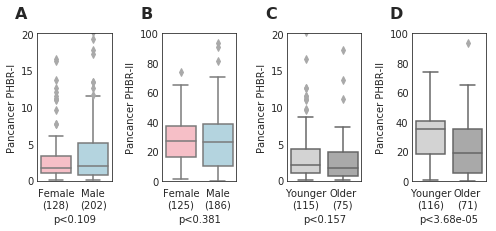

In [54]:
# flierprops
flierprops = dict(markerfacecolor='darkgrey', markersize=5, linestyle='none', markeredgecolor='darkgrey')

# figure

# 1x4 plot
plt.figure(figsize=(7,3))

##################
# A - Sex, MHC-I #
##################
plt.subplot(1,4,1)

p = mannwhitneyu(mhcI_df[mhcI_df['sex']=='female'].PHBR_score.values, 
                 mhcI_df[mhcI_df['sex']=='male'].PHBR_score.values).pvalue
ax = sns.boxplot(x='sex', y='PHBR_score', data=mhcI_df, order=['female', 'male'], 
                 palette=['lightpink', 'lightblue'], flierprops=flierprops)
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pancancer PHBR-I')
plt.xticks([0,1], ['Female\n({})'.format(len(set(mhcI_df[mhcI_df['sex']=='female'].index))), 
                   'Male\n({})'.format(len(set(mhcI_df[mhcI_df['sex']=='male'].index)))])
plt.ylim(-0.1,20.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'A', transform=ax.transAxes, fontsize=16,  weight='bold')

###################
# B - Sex, MHC-II #
###################
plt.subplot(1,4,2)

p = mannwhitneyu(mhcII_df[mhcII_df['sex']=='female'].PHBR_score.values, 
                 mhcII_df[mhcII_df['sex']=='male'].PHBR_score.values).pvalue
ax = sns.boxplot(x='sex', y='PHBR_score', data=mhcII_df, order=['female', 'male'], 
                 palette=['lightpink', 'lightblue'], flierprops=flierprops)
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pancancer PHBR-II')
plt.xticks([0,1], ['Female\n({})'.format(len(set(mhcII_df[mhcII_df['sex']=='female'].index))), 
                   'Male\n({})'.format(len(set(mhcII_df[mhcII_df['sex']=='male'].index)))])
plt.ylim(-0.1,100.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'B', transform=ax.transAxes, fontsize=16,  weight='bold')

##################
# C - Age, MHC-I #
##################
plt.subplot(1,4,3)

data = mhcI_df[mhcI_df['age_categorical_3070']!='middle']
p = mannwhitneyu(data[data['age_categorical_3070']=='younger'].PHBR_score.values, 
                 data[data['age_categorical_3070']=='older'].PHBR_score.values).pvalue
ax = sns.boxplot(x='age_categorical_3070', y='PHBR_score', data=data, 
                 order=['younger', 'older'], palette=['lightgrey', 'darkgrey'], flierprops=flierprops)
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pancancer PHBR-I')
plt.xticks([0,1], ['Younger\n({})'.format(len(set(data[data['age_categorical_3070']=='younger'].index))), 
                   'Older\n({})'.format(len(set(data[data['age_categorical_3070']=='older'].index)))])
plt.ylim(-0.1,20.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'C', transform=ax.transAxes, fontsize=16,  weight='bold')

###################
# D - Age, MHC-II #
###################
plt.subplot(1,4,4)

data = mhcII_df[mhcII_df['age_categorical_3070']!='middle']
p = mannwhitneyu(data[data['age_categorical_3070']=='younger'].PHBR_score.values, 
                 data[data['age_categorical_3070']=='older'].PHBR_score.values).pvalue
ax = sns.boxplot(x='age_categorical_3070', y='PHBR_score', data=data, order=['younger', 'older'], 
                 palette=['lightgrey', 'darkgrey'], flierprops=flierprops)
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pancancer PHBR-II')
plt.xticks([0,1], ['Younger\n({})'.format(len(set(data[data['age_categorical_3070']=='younger'].index))), 
                   'Older\n({})'.format(len(set(data[data['age_categorical_3070']=='older'].index)))])

plt.ylim(-0.1,100.1)
ax.tick_params(axis='y', pad=0)
plt.text(-0.3, 1.1, 'D', transform=ax.transAxes, fontsize=16,  weight='bold')

plt.tight_layout()
savepath = '../figures/Figure_4A-D.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches="tight")
plt.show()

PHBR-I corrected p-values: 
                          0         1
0  Young female, Old female  0.251182
1    Old female, Young male  0.377513
2      Old female, Old male  0.273011
3  Young female, Young male  0.495388
4    Young female, Old male  0.412516
5      Young male, Old male  0.463628

PHBR-II corrected p-values: 
                          0         1
0  Young female, Old female  0.001436
1    Young female, Old male  0.002440
2    Old female, Young male  0.017584
3      Young male, Old male  0.016444
4  Young female, Young male  0.303849
5      Old female, Old male  0.467219

Saving to ../figures/Figure_4E-F.pdf


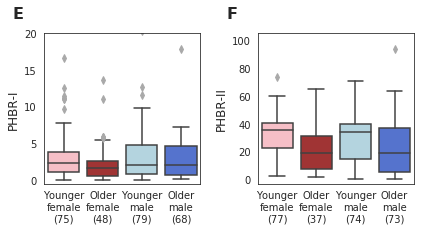

In [56]:
# props
flierprops = dict(markerfacecolor='darkgrey', markersize=5, linestyle='none', markeredgecolor='darkgrey')

plt.figure(figsize=(6,3))

#############
# A. PHBR-I #
#############

# Add age+sex category column
data = mhcI_df.copy()
data['category'] = ['{} {}'.format(data['age_categorical_3070'].values[i], 
                                   data['sex'].values[i]) for i in range(len(data.index.values))]
print('PHBR-I corrected p-values: \n{}\n'.format(pd.DataFrame(get_joint_pvals(data, 'PHBR_score'))))

# Plot subplot
plt.subplot(1,2,1)
ax = sns.boxplot(x='category', y='PHBR_score', data=data, 
                 order=['younger female', 'older female', 'younger male', 'older male'], 
                 palette=['lightpink', 'firebrick', 'lightblue', 'royalblue'],
                 flierprops=flierprops)
plt.xlabel(''), plt.ylabel('PHBR-I', fontsize=12)
plt.xticks([0,1,2,3],['Younger\nfemale\n({})'.format(len(data[data['category']=='younger female'])), 
                      'Older\nfemale\n({})'.format(len(data[data['category']=='older female'])), 
                      'Younger\nmale\n({})'.format(len(data[data['category']=='younger male'])), 
                      'Older\nmale\n({})'.format(len(data[data['category']=='older male']))])
plt.ylim(-0.5,20)
plt.text(-0.2, 1.1, 'E', transform=ax.transAxes, fontsize=16,  weight='bold')

##############
# B. PHBR-II #
##############

# Add age+sex category column
data = mhcII_df.copy()
data['category'] = ['{} {}'.format(data['age_categorical_3070'].values[i], 
                                   data['sex'].values[i]) for i in range(len(data.index.values))]
print('PHBR-II corrected p-values: \n{}\n'.format(pd.DataFrame(get_joint_pvals(data, 'PHBR_score'))))

# Plot subplot
plt.subplot(1,2,2)

ax = sns.boxplot(x='category', y='PHBR_score', data=data, 
                 order=['younger female', 'older female', 'younger male', 'older male'], 
                 palette=['lightpink', 'firebrick', 'lightblue', 'royalblue'],
                 flierprops=flierprops)
plt.xlabel(''), plt.ylabel('PHBR-II', fontsize=12)
plt.xticks([0,1,2,3],['Younger\nfemale\n({})'.format(len(data[data['category']=='younger female'])), 
                      'Older\nfemale\n({})'.format(len(data[data['category']=='older female'])), 
                      'Younger\nmale\n({})'.format(len(data[data['category']=='younger male'])), 
                      'Older\nmale\n({})'.format(len(data[data['category']=='older male']))])
plt.text(-0.2, 1.1, 'F', transform=ax.transAxes, fontsize=16,  weight='bold')
plt.ylim(-3,105)

plt.tight_layout()
savepath = '../figures/Figure_4E-F.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')

plt.show()

### 4. Figure S7
- Combination of discovery and validation results

In [10]:
from itertools import cycle

In [11]:
# Load validation data, add hue column

# MHC-I
mhcI_df['category'] = ['{} {}'.format(mhcI_df['age_categorical_3070'].values[i], 
                                      mhcI_df['sex'].values[i]) for i in range(len(mhcI_df.index.values))]
mhcI_df['val_or_discovery'] = 'Validation'
mhcI_df['hue_cat'] = mhcI_df['category'] + ' ' + mhcI_df['val_or_discovery']  
mhcI_df.rename(columns={'PHBR_score':'scores'}, inplace=True)

# MHC-II
mhcII_df['category'] = ['{} {}'.format(mhcII_df['age_categorical_3070'].values[i], 
                                       mhcII_df['sex'].values[i]) for i in range(len(mhcII_df.index.values))]
mhcII_df['val_or_discovery'] = 'Validation'
mhcII_df['hue_cat'] = mhcII_df['category'] + ' ' + mhcII_df['val_or_discovery']  
mhcII_df.rename(columns={'PHBR_score':'scores'}, inplace=True)

/cellar/users/andreabc/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


PHBR-I corrected p-values: 
                          0         1
0  Young female, Young male  0.000282
1    Young female, Old male  0.000229
2  Young female, Old female  0.007494
3      Old female, Old male  0.299215
4    Old female, Young male  0.300562
5      Young male, Old male  0.422046

PHBR-II corrected p-values: 
                          0             1
0    Young female, Old male  1.733490e-09
1  Young female, Old female  3.963837e-05
2  Young female, Young male  1.402435e-04
3      Young male, Old male  3.621154e-03
4      Old female, Old male  9.612097e-02
5    Old female, Young male  1.445349e-01

Saving to ../figures/S7_discovery_vs_val.pdf


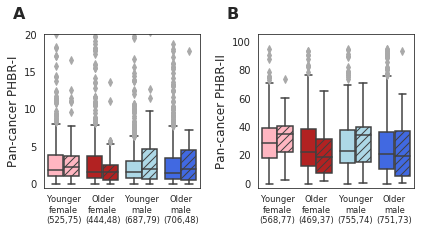

In [12]:
flierprops = dict(markerfacecolor='darkgrey', markersize=5, linestyle='none', markeredgecolor='darkgrey')
hatches = cycle(['', '///'])
boxplot_colors = ['lightpink', 'lightpink', 'firebrick', 'firebrick', 
                  'lightblue', 'lightblue', 'royalblue', 'royalblue']

plt.figure(figsize=(6,3))

#############
# A. PHBR-I #
#############

data = exp_phbrI_score_rm_sex_specific_df.copy()
data['category'] = ['{} {}'.format(data['age_categorical_3070'].values[i], 
                                   data['sex'].values[i]) for i in range(len(data.index.values))]
data['val_or_discovery'] = 'Discovery'
data['hue_cat'] = data['category'] + ' ' + data['val_or_discovery']  
data = data.append(mhcI_df)

print('PHBR-I corrected p-values: \n{}\n'.format(pd.DataFrame(get_joint_pvals(data))))

# Plot subplot
plt.subplot(1,2,1)

ax = sns.boxplot(x='category', y='scores', data=data, 
                 order=['younger female', 'older female', 'younger male', 'older male'], 
                 palette=['lightpink', 'firebrick', 'lightblue', 'royalblue'], 
                 flierprops=flierprops, hue='val_or_discovery')

plt.xlabel(''), plt.ylabel('Pan-cancer PHBR-I', fontsize=12)
plt.xticks([0,1,2,3],['Younger\nfemale\n({},{})'.format(len(data[data['hue_cat']=='younger female Discovery']),len(data[data['hue_cat']=='younger female Validation'])), 
                      'Older\nfemale\n({},{})'.format(len(data[data['hue_cat']=='older female Discovery']),len(data[data['hue_cat']=='older female Validation'])), 
                      'Younger\nmale\n({},{})'.format(len(data[data['hue_cat']=='younger male Discovery']),len(data[data['hue_cat']=='younger male Validation'])), 
                      'Older\nmale\n({},{})'.format(len(data[data['hue_cat']=='older male Discovery']),len(data[data['hue_cat']=='older female Validation']))],
          fontsize='small')

# Set validation hatches
for i, patch in enumerate(ax.artists):
    hatch = next(hatches)
    patch.set_hatch(hatch)
    patch.set_facecolor(boxplot_colors[i])
    
plt.ylim(-0.5,20)
plt.text(-0.2, 1.1, 'A', transform=ax.transAxes, fontsize=16, weight='bold')
ax.legend_.remove()


############## 
# B. PHBR-II #
##############

data = exp_phbrII_score_rm_sex_specific_df.copy()
data['category'] = ['{} {}'.format(data['age_categorical_3070'].values[i], 
                                   data['sex'].values[i]) for i in range(len(data.index.values))]
data['val_or_discovery'] = 'Discovery'
data['hue_cat'] = data['category'] + ' ' + data['val_or_discovery'] 
data = data.append(mhcII_df)

print('PHBR-II corrected p-values: \n{}\n'.format(pd.DataFrame(get_joint_pvals(data))))

# Plot subplot
plt.subplot(1,2,2)

ax = sns.boxplot(x='category', y='scores', data=data, 
                 order=['younger female', 'older female', 'younger male', 'older male'], 
                 palette=['lightpink', 'firebrick', 'lightblue', 'royalblue'], 
                 flierprops=flierprops, hue='val_or_discovery')

plt.xlabel(''), plt.ylabel('Pan-cancer PHBR-II', fontsize=12)
plt.xticks([0,1,2,3],['Younger\nfemale\n({},{})'.format(len(data[data['hue_cat']=='younger female Discovery']),len(data[data['hue_cat']=='younger female Validation'])), 
                      'Older\nfemale\n({},{})'.format(len(data[data['hue_cat']=='older female Discovery']),len(data[data['hue_cat']=='older female Validation'])), 
                      'Younger\nmale\n({},{})'.format(len(data[data['hue_cat']=='younger male Discovery']),len(data[data['hue_cat']=='younger male Validation'])), 
                      'Older\nmale\n({},{})'.format(len(data[data['hue_cat']=='older male Discovery']),len(data[data['hue_cat']=='older male Validation']))],
          fontsize='small')

# set hatches and colors 
for i, patch in enumerate(ax.artists):
    hatch = next(hatches)
    patch.set_hatch(hatch)
    patch.set_facecolor(boxplot_colors[i])
    
plt.text(-0.2, 1.1, 'B', transform=ax.transAxes, fontsize=16,  weight='bold')
plt.ylim(-3,105)
ax.legend_.remove()


plt.tight_layout()
savepath = '../figures/S7_discovery_vs_val.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')
plt.show()